In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('Dataset_BA1A.xlsx')

In [5]:
# df.sum()
df.head()

,TOP_DEPTH,LAG_DEPTH,UNIT_CLASS,MUD_TYPE,UNIT_DESC3_1,UNIT_DESC3_3,UNIT_DESC3_4,REMARKS_1,REMARKS_2,REMARKS_3,...,UNIT_DESC4_2_Cutting Rock Type: Gabbro::Cutting Minerals: Serpentine,UNIT_DESC4_2_Cutting Rock Type: Harzburgite,UNIT_DESC4_2_Cutting Rock Type: Harzburgite::Cutting Minerals: Carbonate,UNIT_DESC4_2_Cutting Rock Type: Harzburgite::Cutting Minerals: Carbonate; Orthopyroxene; Serpentine,UNIT_DESC4_2_Cutting Rock Type: Harzburgite::Cutting Minerals: Carbonate; Serpentine,UNIT_DESC4_2_Cutting Rock Type: Harzburgite::Cutting Minerals: Orthopyroxene,UNIT_DESC4_2_Cutting Rock Type: Harzburgite::Cutting Minerals: Serpentine,UNIT_DESC4_2_Cutting Rock Type: Harzburgite; Alluvium::Cutting Minerals: Serpentine,UNIT_DESC4_2_Cutting Rock Type: Harzburgite; Serpentinite::,UNIT_DESC4_2_Cutting Rock Type: Serpentinite
0,0,15,OPHIO,CU,Cutting Rock Type: Harzburgite::,NaN,NaN,NN,NN,NN,...,0,0,0,0,0,0,0,0,0,0
1,15,16,OPHIO,CU,Cutting Rock Type: Harzburgite; Alluvium::,NaN,NaN,NN,NN,NN,...,0,0,0,0,0,0,0,0,0,0
2,16,17,OPHIO,CU,Cutting Rock Type: Harzburgite; Alluvium::,NaN,NaN,Dominantly partially serpentinized Harzburgite,NN,NN,...,0,0,0,0,0,0,0,0,0,0
3,17,18,OPHIO,CU,Cutting Rock Type: Harzburgite; Alluvium::,NaN,NaN,Dominantly paratially serpentinized harzburgite,NN,NN,...,0,0,0,0,0,0,0,0,0,0
4,18,19,OPHIO,CU,Cutting Rock Type: Harzburgite,Cutting Minerals: Serpentine,NaN,NN,NN,serpentine veins,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='TOP_DEPTH'>

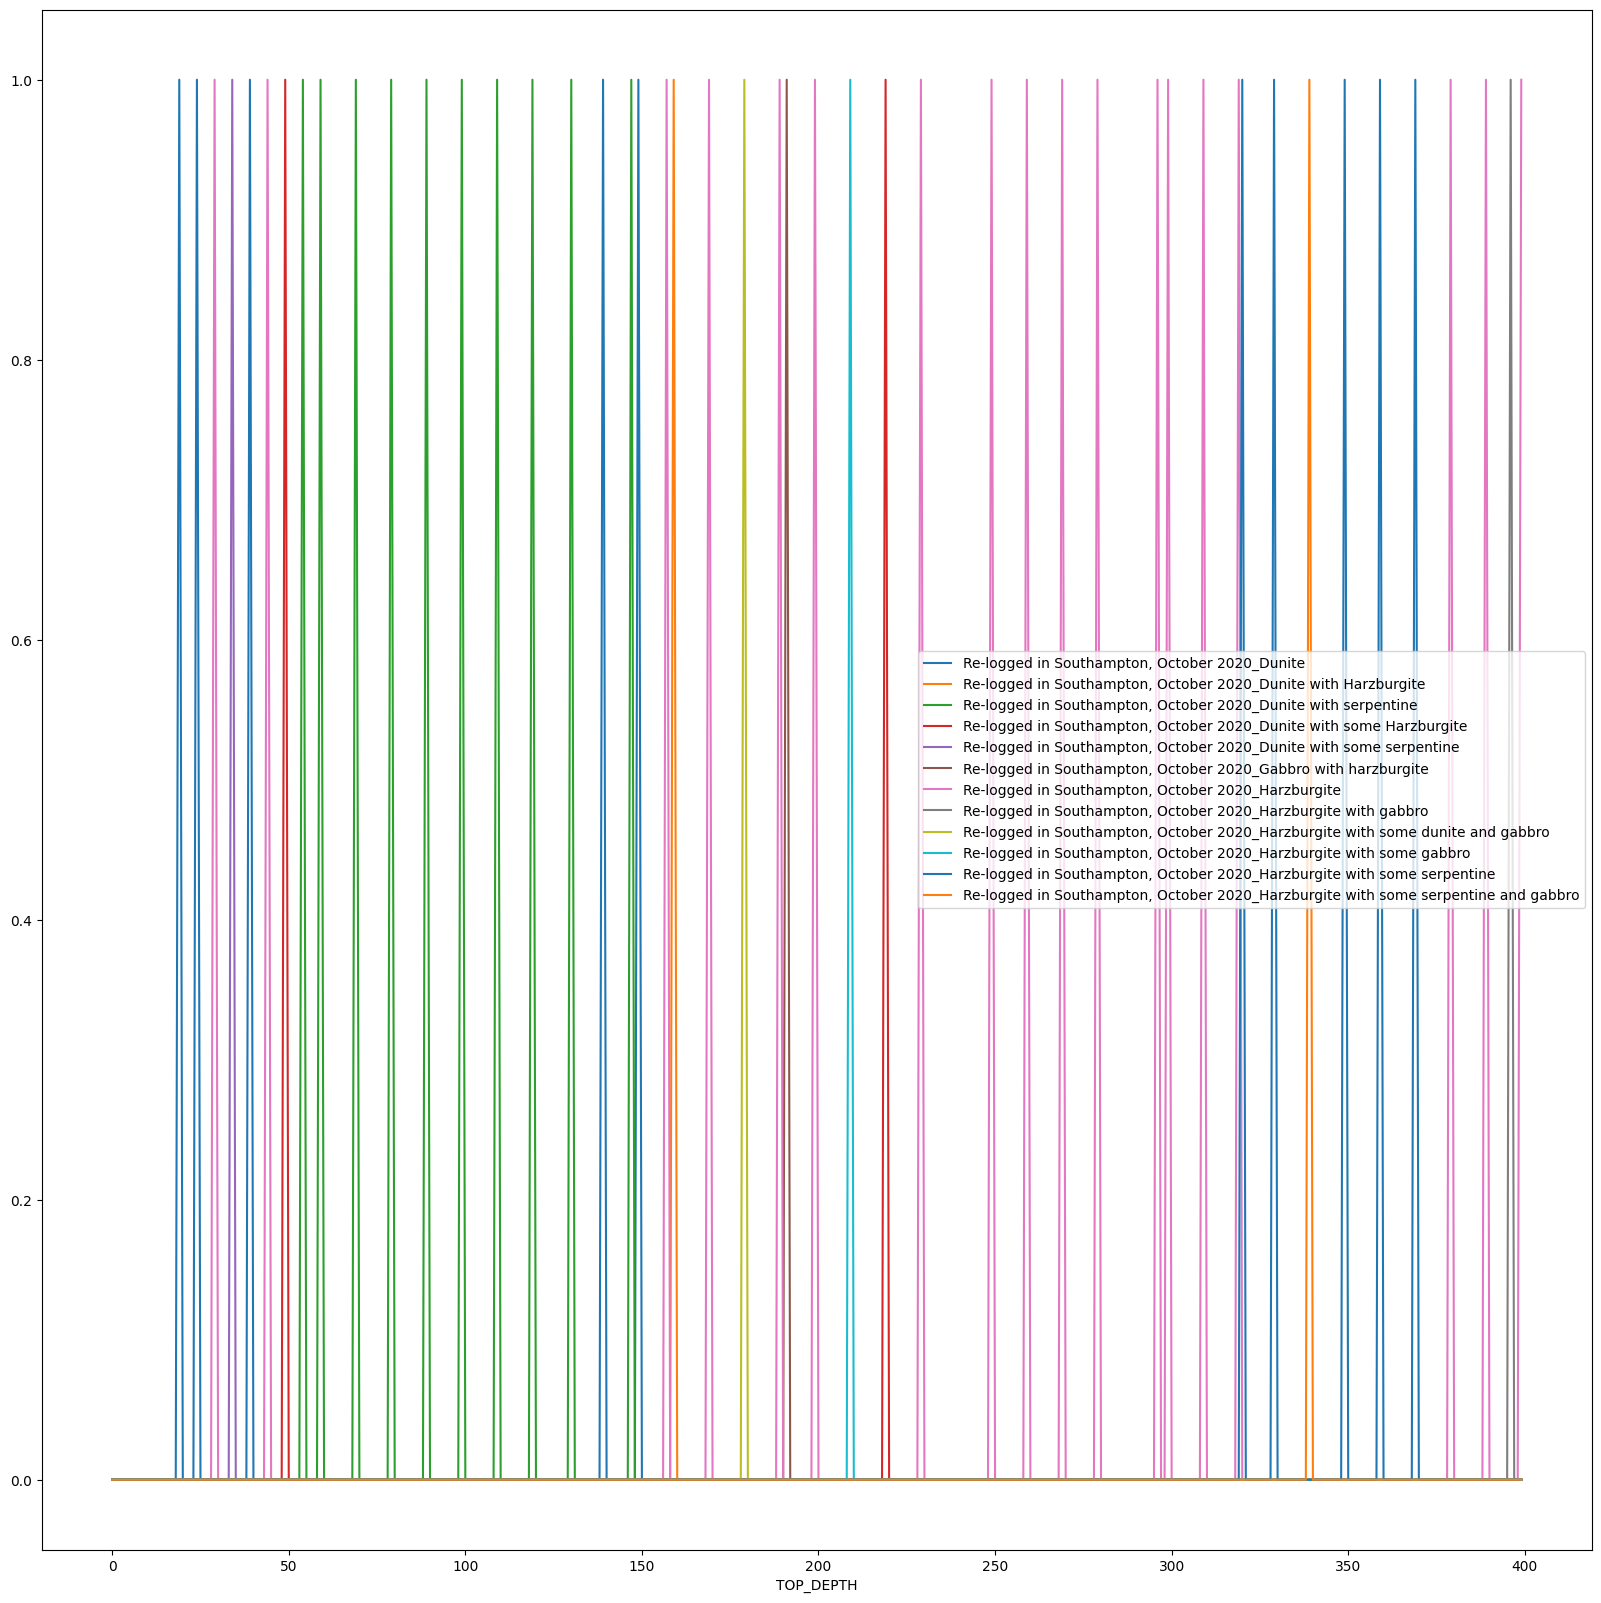

In [8]:
df.set_index('TOP_DEPTH')[['Re-logged in Southampton, October 2020_Dunite',
       'Re-logged in Southampton, October 2020_Dunite with Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with serpentine',
       'Re-logged in Southampton, October 2020_Dunite with some Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with some serpentine',
       'Re-logged in Southampton, October 2020_Gabbro with harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite with gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some dunite and gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine and gabbro',]].plot(figsize=(20, 20))

In [13]:
geology_columns = ['Re-logged in Southampton, October 2020_Dunite',
       'Re-logged in Southampton, October 2020_Dunite with Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with serpentine',
       'Re-logged in Southampton, October 2020_Dunite with some Harzburgite',
       'Re-logged in Southampton, October 2020_Dunite with some serpentine',
       'Re-logged in Southampton, October 2020_Gabbro with harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite',
       'Re-logged in Southampton, October 2020_Harzburgite with gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some dunite and gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some gabbro',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine',
       'Re-logged in Southampton, October 2020_Harzburgite with some serpentine and gabbro',
       'TOP_DEPTH']

(400.0, 0.0)

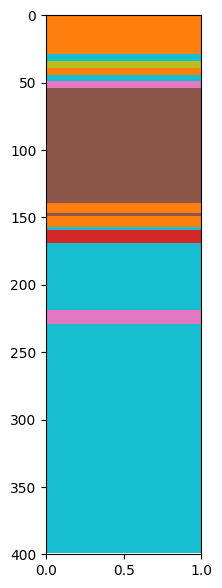

In [72]:
plot_data = geo_df.set_index('TOP_DEPTH').transpose()
for n, idx in enumerate(plot_data.index):
    plot_data.loc[idx] = plot_data.loc[idx] * (n + 1)
plot_data.loc['combined'] = plot_data.sum()
plot_data = plot_data.transpose()
plot_data = plot_data['combined'].replace(0, np.nan).ffill().bfill()

x = np.array([0, 1])
y = np.vstack(plot_data.index)
xx, yy = np.meshgrid(x, y)
Z = np.vstack(plot_data.values)

fig, ax = plt.subplots(figsize=(2, 7))
ax.pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='tab10', shading='auto')
ax.set_ylim(400, 0)

In [41]:
geo_df.set_index('TOP_DEPTH').transpose().sum()

TOP_DEPTH
0      0
15     0
16     0
17     0
18     0
      ..
395    0
396    1
397    0
398    0
399    1
Length: 386, dtype: int64

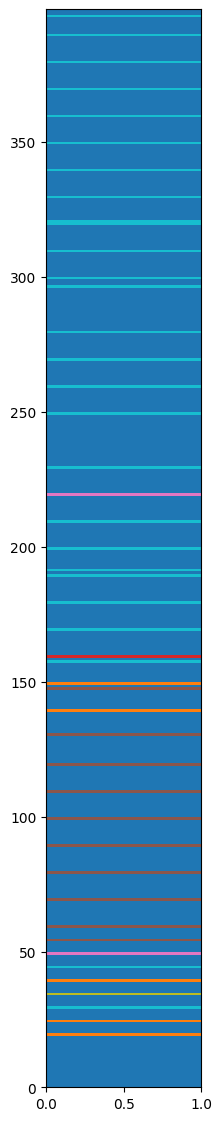

In [26]:
fig, ax = plt.subplots(figsize=(2, 14))
geo_df = df[geology_columns].copy()
geo_df.dropna(inplace=True)

Zs = []

for n, c in enumerate(geology_columns[:-1]):
    n = n + 1
    z = np.vstack(geo_df[c].values*n)
    Zs.append(z)

Z = np.zeros_like(z)
for z in Zs:
    Z += z
    
x = np.array([0, 1])
y = np.vstack(geo_df['TOP_DEPTH'].values)
xx, yy = np.meshgrid(x, y)
    
ax.pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='tab10', shading='auto')
# ax.set_ylim(400, 150)

In [63]:
x

array([0, 1])